# Figure 6

This notebook produces Figure 6 and other auxiliary figures.

In [1]:
import seaborn as sns
import pandas as pd
# import numpy as np
import matplotlib
# import matplotlib.pyplot as plt
from scipy import stats

## Get data

We load the data produced by the previous workflow stored as `../data/results/pej0_GrIS_classification.csv`. See `Fig5.ipynb` for more details.

In [2]:
df = pd.read_csv('../data/results/pej0_GrIS_classification.csv')
df

,$\frac{P_e}{\ell}$ (m$^{-1}$),$J_0$ (m yr$^{-1}$),Speed diff (m yr$^{-1}$),Speed diff (%),Advance (km)
0,0.000021,-915.378881,3029.186179,66.610459,-17.0
1,0.000306,-200.805053,511.123464,84.192696,-2.3
2,-0.000047,-82.857761,456.284207,55.293407,-3.0
3,-0.000034,-450.936824,-435.655180,-12.603562,-0.3
4,0.000078,-1243.208582,-349.572187,-8.164585,-0.2
...,...,...,...,...,...
99,0.000234,-112.716518,613.747370,34.516832,-0.9
100,0.000044,-167.859915,1023.168837,55.202543,-4.1
101,0.000054,-1081.388452,2774.927415,51.468309,-8.8
102,0.000315,5.479272,467.138448,31.283371,-0.9


This histogram gives a quick idea about the distribution of speed change:

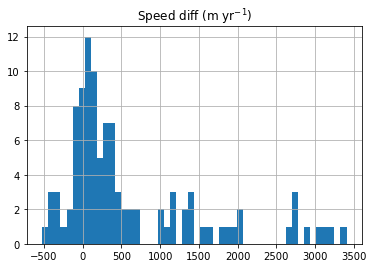

In [3]:
df.hist(column='Speed diff (m yr$^{-1}$)', bins=50);

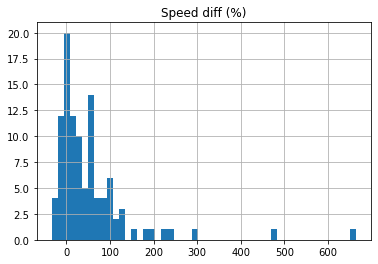

In [4]:
df.hist(column='Speed diff (%)', bins=50);

## Visualization

We add a new column called `Legend` and classify the glaciers based on a simple threshold of speed change (here set to $\pm$300 m/yr):

In [5]:
newclass = []
count = 0
for idx, row in df.iterrows():
    if row['Speed diff (m yr$^{-1}$)'] >= 300 or row['Speed diff (m yr$^{-1}$)'] <= -300:
        newclass.append(r'$|\Delta V| \geq$ 300 m yr$^{-1}$')
        count += 1
    else:
        newclass.append(r'$|\Delta V| <$ 300 m yr$^{-1}$')

df['Legend'] = newclass
print('How many glaciers have a higher speed change?: {}'.format(count))
print('How many glaciers have a lower speed change?:  {}'.format(len(df) - count))

How many glaciers have a higher speed change?: 54
How many glaciers have a lower speed change?:  50


Finally, we plot **Figure 6**:

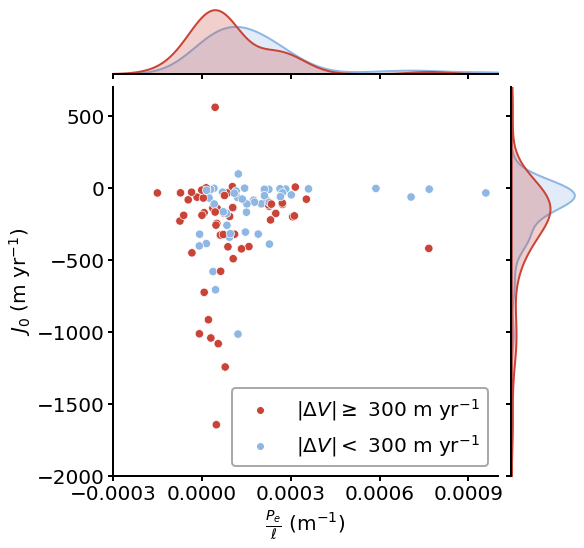

In [6]:
matplotlib.rc('font', size=20)
matplotlib.rc('axes', linewidth=2)

# fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))

cmap = {r'$|\Delta V| \geq$ 300 m yr$^{-1}$': '#C94337', r'$|\Delta V| <$ 300 m yr$^{-1}$': '#8EB7E4'}
f = sns.jointplot(data=df, x=r'$\frac{P_e}{\ell}$ (m$^{-1}$)', y=r'$J_0$ (m yr$^{-1}$)', hue="Legend", palette=cmap, 
                  joint_kws={"s": 70, }, marginal_kws={'linewidth': 2}, height=8)
f.ax_joint.set_xlim([-0.0003, 0.0010])
f.ax_joint.set_ylim([-2000, 700])
f.ax_joint.set_xticks([-0.0003, 0, 0.0003, 0.0006, 0.0009])
f.ax_joint.tick_params(width=2, length=5)
f.ax_marg_x.tick_params(width=2, length=5)
f.ax_marg_y.tick_params(width=2, length=5)
legend = f.ax_joint.legend(loc='lower right')
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('xkcd:gray')
f.savefig('../data/results/Fig6-1.pdf')

In [7]:
unstable_j0 = df[df['Legend'] == r'$|\Delta V| \geq$ 300 m yr$^{-1}$'][r'$J_0$ (m yr$^{-1}$)']
unstable_pe = df[df['Legend'] == r'$|\Delta V| \geq$ 300 m yr$^{-1}$'][r'$\frac{P_e}{\ell}$ (m$^{-1}$)']
stable_j0 = df[df['Legend'] == r'$|\Delta V| <$ 300 m yr$^{-1}$'][r'$J_0$ (m yr$^{-1}$)']
stable_pe = df[df['Legend'] == r'$|\Delta V| <$ 300 m yr$^{-1}$'][r'$\frac{P_e}{\ell}$ (m$^{-1}$)']

In [8]:
stats.kstest(unstable_j0, stable_j0)

KstestResult(statistic=0.3451851851851852, pvalue=0.0028360448053456055)

In [9]:
stats.kstest(unstable_pe, stable_pe)

KstestResult(statistic=0.3237037037037037, pvalue=0.006217578940975077)

In [10]:
U1, p = stats.mannwhitneyu(stable_j0, unstable_j0)

In [11]:
p

0.001338775306495195

<AxesSubplot:xlabel='Speed diff (m yr$^{-1}$)', ylabel='Advance (km)'>

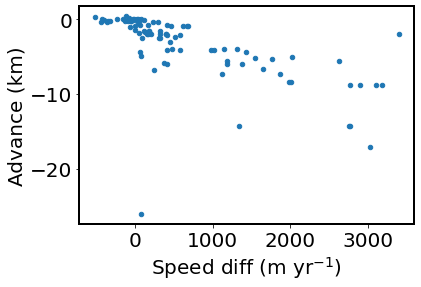

In [12]:
df.plot(x='Speed diff (m yr$^{-1}$)', y='Advance (km)', kind='scatter')

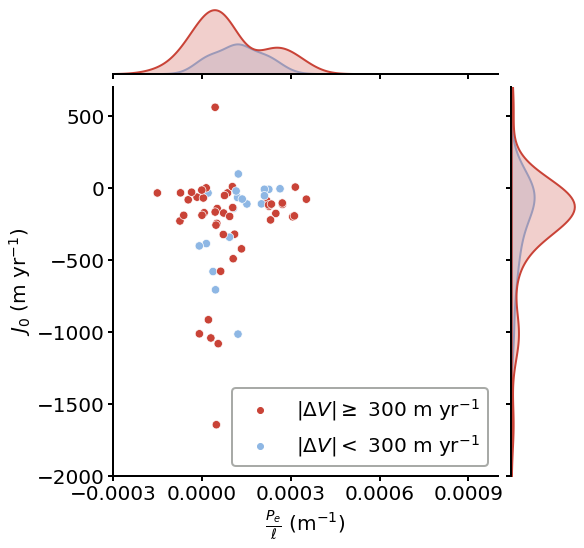

In [13]:
df_1 = df.loc[df['Advance (km)'] < -0.5]

cmap = {r'$|\Delta V| \geq$ 300 m yr$^{-1}$': '#C94337', r'$|\Delta V| <$ 300 m yr$^{-1}$': '#8EB7E4'}
f = sns.jointplot(data=df_1, x=r'$\frac{P_e}{\ell}$ (m$^{-1}$)', y=r'$J_0$ (m yr$^{-1}$)', hue="Legend", palette=cmap, 
                  joint_kws={"s": 70, }, marginal_kws={'linewidth': 2}, height=8)
f.ax_joint.set_xlim([-0.0003, 0.0010])
f.ax_joint.set_ylim([-2000, 700])
f.ax_joint.set_xticks([-0.0003, 0, 0.0003, 0.0006, 0.0009])
f.ax_joint.tick_params(width=2, length=5)
f.ax_marg_x.tick_params(width=2, length=5)
f.ax_marg_y.tick_params(width=2, length=5)
legend = f.ax_joint.legend(loc='lower right')
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('xkcd:gray')
f.savefig('../data/results/Fig6-2.pdf')

In [14]:
unstable_j0_1 = df_1[df_1['Legend'] == r'$|\Delta V| \geq$ 300 m yr$^{-1}$'][r'$J_0$ (m yr$^{-1}$)']
unstable_pe_1 = df_1[df_1['Legend'] == r'$|\Delta V| \geq$ 300 m yr$^{-1}$'][r'$\frac{P_e}{\ell}$ (m$^{-1}$)']
stable_j0_1 = df_1[df_1['Legend'] == r'$|\Delta V| <$ 300 m yr$^{-1}$'][r'$J_0$ (m yr$^{-1}$)']
stable_pe_1 = df_1[df_1['Legend'] == r'$|\Delta V| <$ 300 m yr$^{-1}$'][r'$\frac{P_e}{\ell}$ (m$^{-1}$)']

In [15]:
stats.kstest(unstable_j0_1, stable_j0_1)

KstestResult(statistic=0.24154589371980675, pvalue=0.3662958100582304)

In [16]:
stats.kstest(unstable_pe_1, stable_pe_1)

KstestResult(statistic=0.36231884057971014, pvalue=0.04984912204217817)

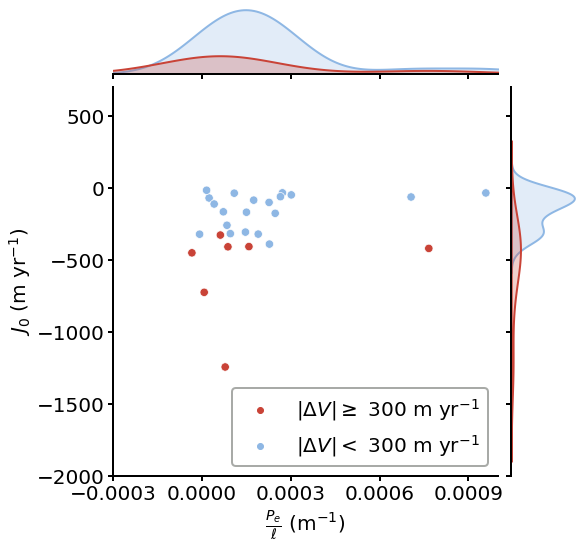

In [17]:
df_2 = df.loc[df['Advance (km)'] > -0.5]

cmap = {r'$|\Delta V| \geq$ 300 m yr$^{-1}$': '#C94337', r'$|\Delta V| <$ 300 m yr$^{-1}$': '#8EB7E4'}
f = sns.jointplot(data=df_2, x=r'$\frac{P_e}{\ell}$ (m$^{-1}$)', y=r'$J_0$ (m yr$^{-1}$)', hue="Legend", palette=cmap, 
                  joint_kws={"s": 70, }, marginal_kws={'linewidth': 2}, height=8)
f.ax_joint.set_xlim([-0.0003, 0.0010])
f.ax_joint.set_ylim([-2000, 700])
f.ax_joint.set_xticks([-0.0003, 0, 0.0003, 0.0006, 0.0009])
f.ax_joint.tick_params(width=2, length=5)
f.ax_marg_x.tick_params(width=2, length=5)
f.ax_marg_y.tick_params(width=2, length=5)
legend = f.ax_joint.legend(loc='lower right')
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('xkcd:gray')
f.savefig('../data/results/Fig6-3.pdf')

In [18]:
unstable_j0_2 = df_2[df_2['Legend'] == r'$|\Delta V| \geq$ 300 m yr$^{-1}$'][r'$J_0$ (m yr$^{-1}$)']
unstable_pe_2 = df_2[df_2['Legend'] == r'$|\Delta V| \geq$ 300 m yr$^{-1}$'][r'$\frac{P_e}{\ell}$ (m$^{-1}$)']
stable_j0_2 = df_2[df_2['Legend'] == r'$|\Delta V| <$ 300 m yr$^{-1}$'][r'$J_0$ (m yr$^{-1}$)']
stable_pe_2 = df_2[df_2['Legend'] == r'$|\Delta V| <$ 300 m yr$^{-1}$'][r'$\frac{P_e}{\ell}$ (m$^{-1}$)']

In [19]:
stats.kstest(unstable_j0_2, stable_j0_2)

KstestResult(statistic=0.95, pvalue=1.8017409321613442e-05)

In [20]:
stats.kstest(unstable_pe_2, stable_pe_2)

KstestResult(statistic=0.4142857142857143, pvalue=0.25506683332770297)